<p style="text-align: center; font-size: 64px; font-family: Arial; color: darkblue">
GGR274<br/><br/>
Final project<br/><br/>
Tutorial section: 0501<br/><br/>
Andrii Ostrolutskyi<br/><br/>
Student number: 1009772943
</p>

<p style="text-align: center; font-size: 64px; font-family: Arial; color: darkblue">1. Introduction</p>


    
<p style="font-size: 36px; font-family: Arial; color: darkblue">• Project question: "Is there a correlation between the number of new immigrants and Emergency Department (ED) visits of low urgency in Toronto neighbourhoods? If so, what is the correlation?"<br/><br/>• Statistical approaches used:<br/><br/><p style="font-size: 30px; font-family: Arial; color: darkblue"> &nbsp &nbsp &nbsp 1. Descriptive statistics (calculating the mean ED visit rates for every group of Toronto neighbourhoods with different numbers of new immigrants).<br/><br/>&nbsp &nbsp &nbsp 2. Statistical hypothesis testing (finding a p-value to validate the found hypothesis or disprove it)</p>
</p>

<p style="text-align: center; font-size: 64px; font-family: Arial; color: darkblue">2. Data</p>
 

<p style="font-size: 36px; font-family: Arial; color: darkblue">
I used two datasets from Ontario Community Health Profiles: 1. <b><i>edc_All_HU_LU_EDvisits_2015-2016_RPDB_neighb_LHIN.xlsx</i></b>, 2. <b>population_characteristics_Toronto_2021_7.xlsx</b>.
<br/><br/>
1. <b><i>edc_All_HU_LU_EDvisits_2015-2016_RPDB_neighb_LHIN.xlsx</i></b> is a dataset on all 2015/2016 Emergency Department visit rates in Toronto. I used the sheet named <b>Low_Urgency_EDvisits</b>. In order to answer my project question, I chose columns named <b>Neighb ID</b>, <b>Neighbourhood Name</b>, and <b>Age-Standardized rate of ED visits (/1000 population) that are Low Urgency †, All Ages 0+</b>. 
<br/><br/>
2. <b><i>population_characteristics_Toronto_2021_7.xlsx</i></b> is census of population that contains data about the population with immigrant and generation statuses, and data on visible minorities from 2011 to 2021. I used the sheet named <b>8_ImmStatus</b> and I chose columns named <b>Neighb ID</b>, <b>Neighbourhood Name</b>, and <b>Population who Received Immigration Status Between 2011 - 2015 (%)</b>.
</p>

<p style="text-align: center; font-size: 64px; font-family: Arial; color: darkblue">3. Methods</p>

<p style="font-size: 36px; font-family: Arial; color: darkblue">
To answer my research question, I divided the process into two steps: 1. finding the correlation between the percent of the population who received immigration status and the rate of low-urgency ED visits; 2. proving that this correlation is true, that is the rate of ED visits depends on the number of recent immigrants.<br/><br/> 1. For the first part of my research, I decided to use quartiles to divide Toronto neighbourhoods into 4 groups: Toronto neighbourhoods with<p style="font-size: 30px; font-family: Arial; color: darkblue"> &nbsp &nbsp &nbsp 1) high number of new immigrants,<br/><br/>&nbsp &nbsp &nbsp 2) normal number of new immigrants,<br/><br/>&nbsp &nbsp &nbsp 3) low number of new immigrants,<br/><br/>&nbsp &nbsp &nbsp 4) very low number of new immigrants.<br/><br/> &nbsp &nbsp &nbsp Then, I calculated the mean ED visit rates of the neighbourhoods by this group membership. To do that, I merged two datasets on `Neigh ID` beforehand. The mean ED visit rates revealed there is a correlation between the number of new immigrants and the low-urgency ED visit rate. This is an alternative hypothesis.</p></p>
<p style="font-size: 36px; font-family: Arial; color: darkblue">
2. In the second part of my project, I proved that this hypothesis is true and that the correlation that exists did not happen by chance or by coincidence. To that end, I conducted statistical hypothesis testing. Firstly, I assumed the null hypothesis is true. Secondly, I calculated the p-value. I found that the p-value equals <b>0.007</b>, which means that there is a 0.7% chance to obtain the results at least extreme as the test results actually observed. This small p-value indicates that the results observed are very unlikely under the null hypothesis and the alternative hypothesis is more likely to be true.
</p>

<p style="text-align: center; font-size: 64px; font-family: Arial; color: darkblue">4. Results</p>

### 4.1 Code to discover and visualize how ED visit rates vary across Toronto neighbourhoods with different levels of the number of immigrants:

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


%pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
ed_visits_raw = pd.read_excel('edc_All_HU_LU_EDvisits_2015-2016_RPDB_neighb_LHIN.xlsx', 
                          sheet_name='Low_Urgency_EDvisits', header = 14)

In [3]:
ed_visits = ed_visits_raw[ed_visits_raw.columns[[0, 1, 10]]]



In [4]:
new_column_names = {'Unnamed: 0' : 'Neighb ID', 'Unnamed: 1' : 'Neighbourhood Name', 'Both sexes.2' : 'Rate of ED visits'}
ed_visits_renamed = ed_visits.rename(columns = new_column_names)
ed_visits_renamed

,Neighb ID,Neighbourhood Name,Rate of ED visits
0,1,West Humber-Clairville,56.4
1,2,Mount Olive-Silverstone-Jamestown,57.6
2,3,Thistletown-Beaumond Heights,62.7
3,4,Rexdale-Kipling,75.0
4,5,Elms-Old Rexdale,68.5
...,...,...,...
137,138,Eglinton East,79.0
138,139,Scarborough Village,78.2
139,140,Guildwood,73.5
140,NaN,City of Toronto,87.3


In [5]:
immigr_population_raw = pd.read_excel('population_characteristics_Toronto_2021_7.xlsx', 
                          sheet_name='8_ImmStatus', header = 9)

In [6]:
immigr_population = immigr_population_raw[immigr_population_raw.columns[[0, 1, 8]]]
immigr_population

,Neighb ID,Neighbourhood Name,Population who Received Immigration Status Between 2011 - 2015 (%)
0,1.0,West Humber-Clairville,6.2
1,2.0,Mount Olive-Silverstone-Jamestown,10.5
2,3.0,Thistletown-Beaumond Heights,4.0
3,4.0,Rexdale-Kipling,5.3
4,5.0,Elms-Old Rexdale,5.4
...,...,...,...
154,171.0,Junction-Wallace Emerson,2.7
155,172.0,Dovercourt Village,1.7
156,173.0,North Toronto,5.3
157,174.0,South Eglinton-Davisville,4.7


In [7]:
ed_immigr = ed_visits_renamed.merge(immigr_population, on = ['Neighb ID', 'Neighbourhood Name'])
ed_immigr

,Neighb ID,Neighbourhood Name,Rate of ED visits,Population who Received Immigration Status Between 2011 - 2015 (%)
0,1,West Humber-Clairville,56.4,6.2
1,2,Mount Olive-Silverstone-Jamestown,57.6,10.5
2,3,Thistletown-Beaumond Heights,62.7,4.0
3,4,Rexdale-Kipling,75.0,5.3
4,5,Elms-Old Rexdale,68.5,5.4
...,...,...,...,...
116,136,West Hill,89.8,5.5
117,138,Eglinton East,79.0,8.2
118,139,Scarborough Village,78.2,7.6
119,140,Guildwood,73.5,2.9


In [8]:
#Creating a new column dividing neighbourhoods into quantiles based on the number of immigrants

sort_immigr_rates = ed_immigr['Population who Received Immigration Status Between 2011 - 2015 (%)'].sort_values()
sort_immigr_rates_quartile = sort_immigr_rates.quantile([0.25, 0.5, 0.75])

ed_immigr.loc[(ed_immigr['Population who Received Immigration Status Between 2011 - 2015 (%)'] < sort_immigr_rates_quartile.get(key = 0.25)), 'Immigration label'] = 'Very low'
ed_immigr.loc[(ed_immigr['Population who Received Immigration Status Between 2011 - 2015 (%)'] >= sort_immigr_rates_quartile.get(key = 0.25)) & (ed_immigr['Population who Received Immigration Status Between 2011 - 2015 (%)'] < sort_immigr_rates_quartile.get(key = 0.5)), 'Immigration label'] = 'Low'
ed_immigr.loc[(ed_immigr['Population who Received Immigration Status Between 2011 - 2015 (%)'] >= sort_immigr_rates_quartile.get(key = 0.5)) & (ed_immigr['Population who Received Immigration Status Between 2011 - 2015 (%)'] < sort_immigr_rates_quartile.get(key = 0.75)), 'Immigration label'] = 'Normal'
ed_immigr.loc[(ed_immigr['Population who Received Immigration Status Between 2011 - 2015 (%)'] >= sort_immigr_rates_quartile.get(key = 0.75)), 'Immigration label'] = 'High'
ed_immigr


,Neighb ID,Neighbourhood Name,Rate of ED visits,Population who Received Immigration Status Between 2011 - 2015 (%),Immigration label
0,1,West Humber-Clairville,56.4,6.2,High
1,2,Mount Olive-Silverstone-Jamestown,57.6,10.5,High
2,3,Thistletown-Beaumond Heights,62.7,4.0,Low
3,4,Rexdale-Kipling,75.0,5.3,Normal
4,5,Elms-Old Rexdale,68.5,5.4,Normal
...,...,...,...,...,...
116,136,West Hill,89.8,5.5,Normal
117,138,Eglinton East,79.0,8.2,High
118,139,Scarborough Village,78.2,7.6,High
119,140,Guildwood,73.5,2.9,Low


In [9]:
mean_table = ed_immigr.groupby('Immigration label')['Rate of ED visits'].mean()
mean_table = mean_table.sort_values(ascending = False)
print(mean_table)

observed_very_low_low = mean_table[0] - mean_table[1]
observed_low_normal = mean_table[1] - mean_table[2]
observed_normal_high = mean_table[2] - mean_table[3]

observed_diff_list = [observed_very_low_low, observed_low_normal, observed_normal_high]
observed_diff_list

Immigration label
Very low    99.000000
Low         95.442424
Normal      82.413793
High        73.468750
Name: Rate of ED visits, dtype: float64


[3.557575757575762, 13.028631138975967, 8.94504310344827]

In [22]:
toronto_neighbourhoods = gpd.GeoDataFrame.from_file("Toronto_Neighbourhoods.geojson")
#print(toronto_neighbourhoods)
important_cols = toronto_neighbourhoods.columns[[4, 5, 17]]
colnames = {important_cols[0]: 'Neighbourhood Name', important_cols[1] : 'Neighb ID'}

toronto_neighbourhoods = toronto_neighbourhoods[important_cols]
toronto_neighbourhoods.rename(columns = colnames, inplace=True)


toronto_neighbourhoods['Neighb ID'] = toronto_neighbourhoods['Neighb ID'].astype(int)


toronto_neighbourhoods

,Neighbourhood Name,Neighb ID,geometry
0,Casa Loma (96),96,"POLYGON ((-79.41469 43.67391, -79.41485 43.674..."
1,Annex (95),95,"POLYGON ((-79.39414 43.66872, -79.39588 43.668..."
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681..."
3,Woodbine Corridor (64),64,"POLYGON ((-79.31485 43.66674, -79.31660 43.666..."
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703..."
...,...,...,...
135,Dorset Park (126),126,"POLYGON ((-79.29443 43.77273, -79.29359 43.772..."
136,Centennial Scarborough (133),133,"POLYGON ((-79.14511 43.76637, -79.14507 43.767..."
137,Humbermede (22),22,"POLYGON ((-79.52628 43.73640, -79.52649 43.736..."
138,Willowdale West (37),37,"POLYGON ((-79.44043 43.76340, -79.44052 43.763..."


In [11]:
ed_by_neighbourhoods = toronto_neighbourhoods.merge(ed_visits_renamed, on = 'Neighb ID', how = 'left')
ed_by_neighbourhoods

,Neighbourhood Name_x,Neighb ID,geometry,Neighbourhood Name_y,Rate of ED visits
0,Casa Loma (96),96,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",Casa Loma,80.0
1,Annex (95),95,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",Annex,86.1
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",Caledonia-Fairbank,102.4
3,Woodbine Corridor (64),64,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",Woodbine Corridor,97.9
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",Lawrence Park South,59.7
...,...,...,...,...,...
135,Dorset Park (126),126,"POLYGON ((-79.29443 43.77273, -79.29359 43.772...",Dorset Park,71.6
136,Centennial Scarborough (133),133,"POLYGON ((-79.14511 43.76637, -79.14507 43.767...",Centennial Scarborough,70.5
137,Humbermede (22),22,"POLYGON ((-79.52628 43.73640, -79.52649 43.736...",Humbermede,66.3
138,Willowdale West (37),37,"POLYGON ((-79.44043 43.76340, -79.44052 43.763...",Willowdale West,87.4


In [12]:
immigr_by_neighbourhoods = toronto_neighbourhoods.merge(immigr_population, on = 'Neighb ID', how = 'left')
immigr_by_neighbourhoods

,Neighbourhood Name_x,Neighb ID,geometry,Neighbourhood Name_y,Population who Received Immigration Status Between 2011 - 2015 (%)
0,Casa Loma (96),96,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",Casa Loma,1.4
1,Annex (95),95,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",Annex,2.5
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",Caledonia-Fairbank,3.7
3,Woodbine Corridor (64),64,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",Woodbine Corridor,2.0
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",Lawrence Park South,3.1
...,...,...,...,...,...
135,Dorset Park (126),126,"POLYGON ((-79.29443 43.77273, -79.29359 43.772...",Dorset Park,6.9
136,Centennial Scarborough (133),133,"POLYGON ((-79.14511 43.76637, -79.14507 43.767...",Centennial Scarborough,1.9
137,Humbermede (22),22,"POLYGON ((-79.52628 43.73640, -79.52649 43.736...",Humbermede,8.8
138,Willowdale West (37),37,"POLYGON ((-79.44043 43.76340, -79.44052 43.763...",Willowdale West,6.0


### 4.2 Code for significance testing:

In [13]:
simulated_very_low_low_list = []
simulated_low_normal_list = []
simulated_normal_high_list = []

def random_shuffle_mean():
    
    #Shuffle
    immg_label_shuffle = ed_immigr['Immigration label'].sample(frac = 1, replace=False).reset_index(drop = True)
    #Calculate simulated means
    very_low_simulated_mean = ed_immigr.loc[immg_label_shuffle == 'Very low', 'Rate of ED visits'].mean()
    low_simulated_mean  = ed_immigr.loc[immg_label_shuffle == 'Low', 'Rate of ED visits'].mean()
    normal_simulated_mean = ed_immigr.loc[immg_label_shuffle == 'Normal', 'Rate of ED visits'].mean()
    high_simulated_mean = ed_immigr.loc[immg_label_shuffle == 'High', 'Rate of ED visits'].mean()
    #Calculate simulated differences
    simulated_very_low_low = very_low_simulated_mean - low_simulated_mean
    simulated_low_normal = low_simulated_mean - normal_simulated_mean
    simulated_normal_high = normal_simulated_mean - high_simulated_mean
    #Append to lists
    simulated_very_low_low_list.append(simulated_very_low_low)
    simulated_low_normal_list.append(simulated_low_normal)
    simulated_normal_high_list.append(simulated_normal_high)
    


In [14]:
simulated_very_low_low_list.clear()
simulated_low_normal_list.clear()
simulated_normal_high_list.clear()
for _ in range(5000):
    random_shuffle_mean()


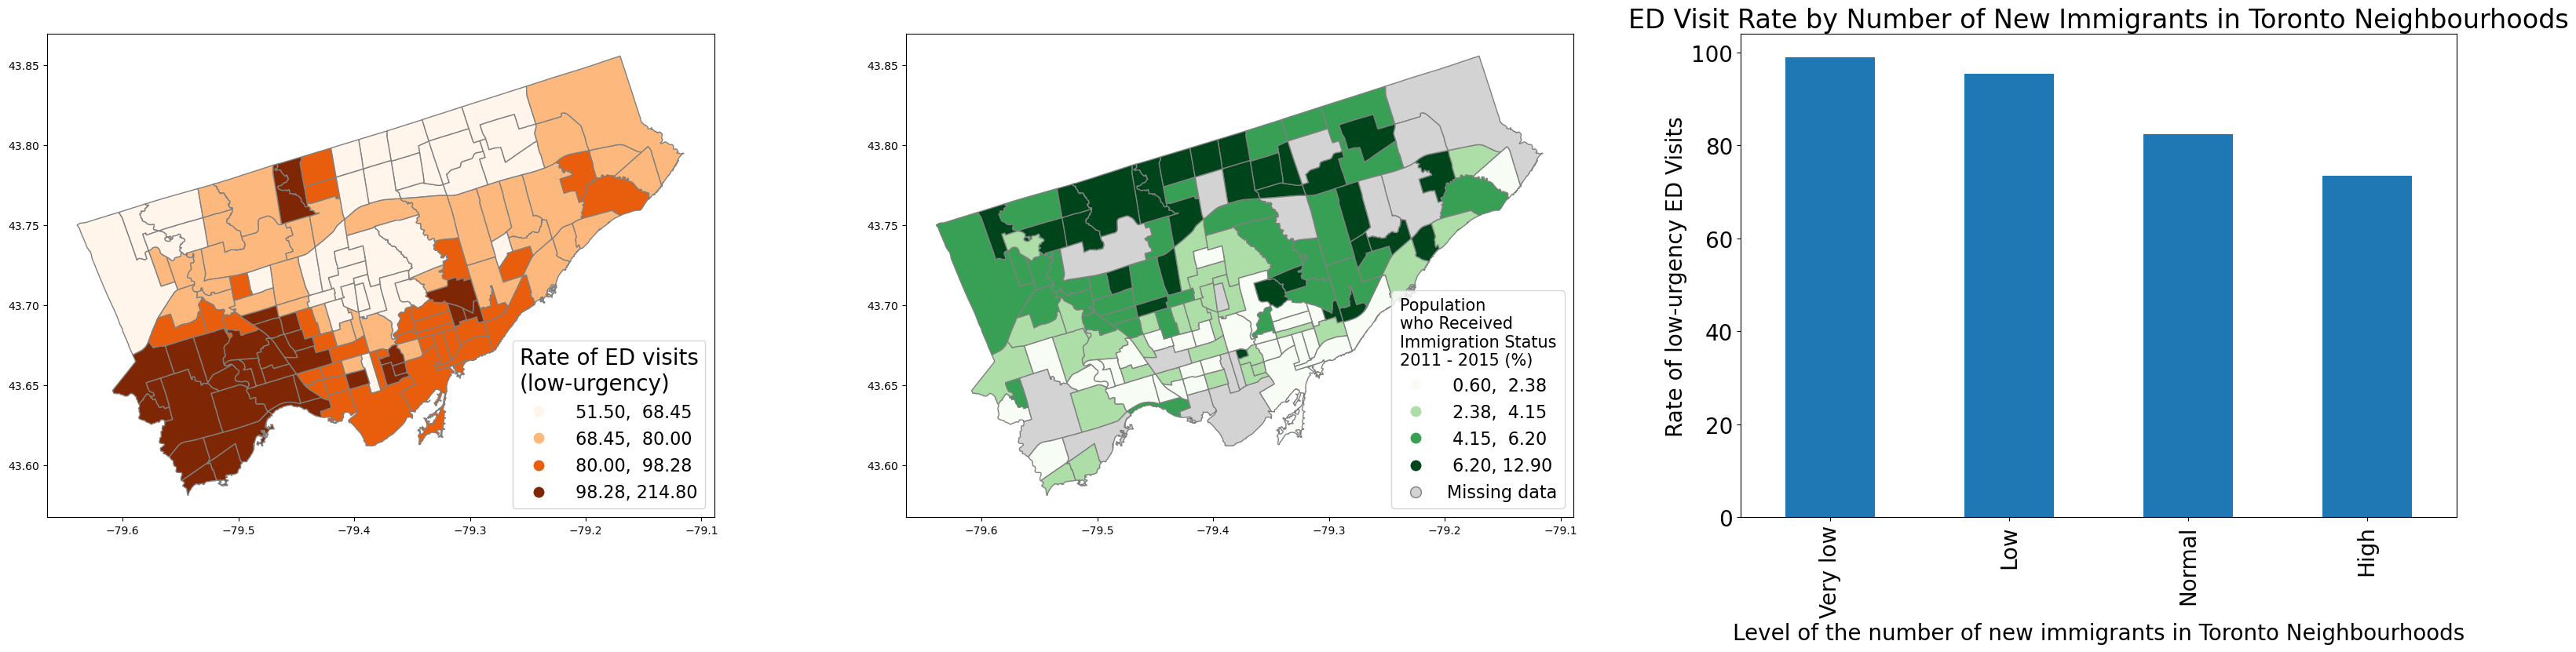

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize =  (40,8))


plt.title("ED Visit Rate by Number of New Immigrants in Toronto Neighbourhoods", fontsize = 24) 
mean_plot = mean_table.plot.bar( ax = axes[2], fontsize = 20)
mean_plot.set_xlabel("Level of the number of new immigrants in Toronto Neighbourhoods", size = 20)
mean_plot.set_ylabel("Rate of low-urgency ED Visits", size = 20)

ed_by_neighbourhoods.plot(column='Rate of ED visits', ax=axes[0], scheme='quantiles',
                  k=4, cmap='Oranges', edgecolor='grey', 
                  legend=True, missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey', 
                                             'label': 'Missing values'},
                  legend_kwds={'loc': 4, 'title': 'Rate of ED visits\n(low-urgency)', 
                               'title_fontsize': 20,'fontsize': 16})

immigr_by_neighbourhoods.plot(column='Population who Received Immigration Status Between 2011 - 2015 (%)', ax=axes[1], scheme='quantiles', 
                  k=4, cmap='Greens', edgecolor='grey', 
                  legend=True, missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey', 
                                             'label': 'Missing data'},
                  legend_kwds={'loc': 4, 'title': 'Population\nwho Received\nImmigration Status\n2011 - 2015 (%)', 
                               'title_fontsize': 15,'fontsize': 16})

print("")




In [16]:

rightextreme_very_low_low = simulated_very_low_low_list >= observed_very_low_low
leftextreme_very_low_low = simulated_very_low_low_list <= -1*observed_very_low_low

pval_very_low_low = (rightextreme_very_low_low.sum() + leftextreme_very_low_low.sum()) / 5000

print(f"Right extreme = {rightextreme_very_low_low.sum()}" )
print(f"Left extreme = {leftextreme_very_low_low.sum()}" )
print(f"Proportion of extreme values = {pval_very_low_low}")





Right extreme = 1505
Left extreme = 1558
Proportion of extreme values = 0.6126


In [17]:


rightextreme_low_normal = simulated_low_normal_list >= observed_low_normal
leftextreme_low_normal = simulated_low_normal_list <= -1*observed_low_normal

pval_low_normal = (rightextreme_low_normal.sum() + leftextreme_low_normal.sum()) / 5000


print(f"Right extreme = {rightextreme_low_normal.sum()}" )
print(f"Left extreme = {leftextreme_low_normal.sum()}" )
print(f"Proportion of extreme values = {pval_low_normal}")

Right extreme = 138
Left extreme = 166
Proportion of extreme values = 0.0608


In [18]:


rightextreme_normal_high = simulated_normal_high_list >= observed_normal_high
leftextreme_normal_high = simulated_normal_high_list <= -1*observed_normal_high

pval_normal_high = (rightextreme_normal_high.sum() + leftextreme_normal_high.sum()) / 5000

print(f"Right extreme = {rightextreme_normal_high.sum()}" )
print(f"Left extreme = {leftextreme_normal_high.sum()}" )
print(f"Proportion of extreme values = {pval_normal_high}")

Right extreme = 464
Left extreme = 494
Proportion of extreme values = 0.1916


In [19]:
pval = pval_very_low_low * pval_low_normal * pval_normal_high
print(f"P-value = {pval}")

P-value = 0.007136348928


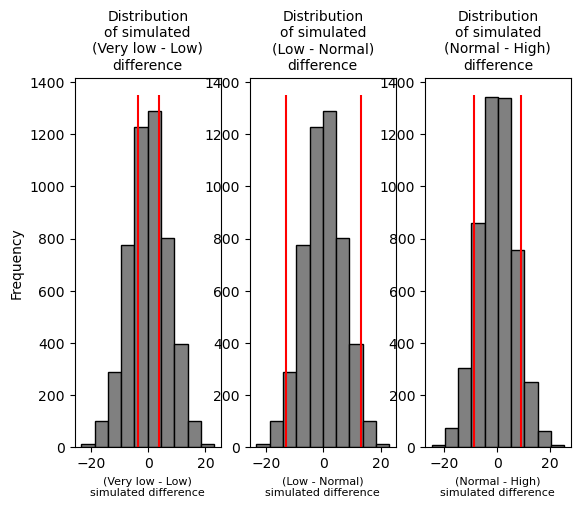

In [20]:
plt.subplot(1,3,1)


plt.hist(simulated_low_normal_list, color = 'grey', edgecolor = 'black')

plt.vlines(x = observed_very_low_low, ymin = 0, ymax = 1350, color = 'red')

plt.vlines(x = -1*observed_very_low_low, ymin = 0, ymax = 1350, color = 'red')

plt.title('Distribution\nof simulated\n(Very low - Low)\ndifference', fontsize = 10)

plt.xlabel("(Very low - Low)\nsimulated difference", fontsize = 8)
plt.ylabel("Frequency")

#

plt.subplot(1,3,2)

plt.hist(simulated_low_normal_list, color = 'grey', edgecolor = 'black')

plt.vlines(x = observed_low_normal, ymin = 0, ymax = 1350, color = 'red')

plt.vlines(x = -1*observed_low_normal, ymin = 0, ymax = 1350, color = 'red')

plt.title('Distribution\nof simulated\n(Low - Normal)\ndifference', fontsize = 10)

plt.xlabel("(Low - Normal)\nsimulated difference", fontsize = 8)

#

plt.subplot(1,3,3)

plt.hist(simulated_normal_high_list, color = 'grey', edgecolor = 'black')

plt.vlines(x = observed_normal_high, ymin = 0, ymax = 1350, color = 'red')

plt.vlines(x = -1*observed_normal_high, ymin = 0, ymax = 1350, color = 'red')

plt.title('Distribution\nof simulated\n(Normal - High)\ndifference', fontsize = 10)

plt.xlabel("(Normal - High)\nsimulated difference", fontsize = 8)

print("")


<p style="font-size: 17px; font-family: Arial; color: darkblue">
Statistical hypothesis testing:<br/><br/>1. Chose the 3 test statistics (differences in mean low-urgency ED rate): 1) <i>Very low - low</i>, 2) <i>Low - Normal</i>, 3) <i>Normal - High</i><br/><br/>2. Calculated the observed differences: <i>Very low - low</i> = 3.5, <i>Low - Normal</i> = 13, <i>Normal - High</i> = 8.9<br/><br/>3. Shuffled the immigration labels and assign them randomly to Toronto neighbourhoods using the funtion that I wrote <b><i>random_shuffle_mean()</i></b><br/><br/>4. Calculated the means for each simulated group.<br/><br/>5. Calculated simulated differences <i>Very low - low</i>, <i>Low - Normal</i>, <i>Normal - High</i><br/><br/>6. Repeated step 3-5 5000 times<br/><br/>7. Calculated p-values for each of the differences (approximately): <i>p-value(Very low - low)</i> = 0.6, <i>p-value(Low - Normal)</i> = 0.05, <i>p-value(Normal - High)</i> = 0.2<br/><br/>8. Multipled all the p-values above to get the final p-value, which equals approximately <b>0.007</b></p>
    


<p style="text-align: center; font-size: 64px; font-family: Arial; color: darkblue">5. Conclusion</p>

<p style="font-size: 36px; font-family: Arial; color: darkblue">• There is a correlation between the number of new immigrants and Emergency Department (ED) visits of low urgency in Toronto neighbourhoods: the more new immigrants there are in Toronto neighbourhoods, the fewer ED visits of low urgency.<br/><br/>• The hypothesis that this correlation is most likely to be true and it did not happen by coincidence was proven by statistical hypothesis testing.<br/><br/>• The reasons for this phenomenon that immigrants make ED visits less frequently than the host population might be due to the language barriers, the unfamiliarity of how the healthcare system works in Canada, or financial reasons.<br/><br/>• As I said, although low-urgency ED visits are made for less severe conditions than high-urgency ED visits, they still require an ED setting and it might be detrimental for people to not make such low-urgency ED visits. That is why this problem among new immigrants should be addressed.<br/><br/>• Lastly, the dataset on ED visit rates had missing values for a few neighbourhoods, which might have affected the accuracy of the project. These neighbourhoods were excluded from the research. If there were data with no missing values, it would improved the accuracy of my project. </p>